## Part Time Data Science 07 class: Phase 3 Project
### Project by: Nicholas Kirui
### Date of Submission: 01 September 2024

## Import libraries


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#  Import dataset


In [3]:
data = './Data/bigml.csv'

df = pd.read_csv(data)

# Exploratory data analysis

Explore the data to gain insights about the data. 

In [4]:
# preview the dataset
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# view dimensions of dataset
df.shape

(3333, 21)

Dataset has 21 variables and 3333 instances

### Identify the columns in the dataset

In [6]:
# review the column names
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Types of variables
In this section, I segregate the dataset into categorical and numerical variables. 
- There are a mixture of categorical and numerical variables in the dataset. 
- Categorical variables have data type object
- Numerical variables have data type float64

#### First of all, I will find categorical variables

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [9]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


### Summary of categorical variables

- There are 4 categorical variables. These are given by:
        -`state`, `phone number`, `international plan`,  and  `voice mail plan`


- There are two binary categorical variables:
        - `international plan`,  and  `voice mail plan`


## Explore problems within categorical variables

### Missing values in categorical variables

In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in categorical variables

### Frequency counts of categorical variables

check the frequency counts of categorical variables.

In [11]:
# view frequency of categorical variables - state

print(df['state'].value_counts())

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64


In [12]:
# view frequency of categorical variables: phone number

print(df['phone number'].value_counts())

383-2251    1
414-7942    1
380-4374    1
329-6562    1
399-8859    1
           ..
362-7318    1
332-8160    1
331-4807    1
414-2905    1
402-9173    1
Name: phone number, Length: 3333, dtype: int64


In [13]:
# view frequency of categorical variables: international plan

print(df['international plan'].value_counts())

no     3010
yes     323
Name: international plan, dtype: int64


In [14]:
# view frequency of categorical variables: voice mail plan

print(df['voice mail plan'].value_counts())

no     2411
yes     922
Name: voice mail plan, dtype: int64


### View the frequency distribution of categorical variables

In [15]:
# view frequency distribution of categorical variables: state

print(df['state'].value_counts()/np.float64(len(df)))

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OR    0.023402
OH    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
MI    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NJ    0.020402
NC    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
MS    0.019502
MA    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ND    0.018602
NM    0.018602
ME    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64


In [16]:
# view frequency distribution of categorical variables: phone number

print(df['phone number'].value_counts()/np.float64(len(df)))

383-2251    0.0003
414-7942    0.0003
380-4374    0.0003
329-6562    0.0003
399-8859    0.0003
             ...  
362-7318    0.0003
332-8160    0.0003
331-4807    0.0003
414-2905    0.0003
402-9173    0.0003
Name: phone number, Length: 3333, dtype: float64


In [17]:
# view frequency distribution of categorical variables: international plan

print(df['international plan'].value_counts()/np.float64(len(df)))

no     0.90309
yes    0.09691
Name: international plan, dtype: float64


In [18]:
# view frequency distribution of categorical variables: voice mail plan

print(df['voice mail plan'].value_counts()/np.float64(len(df)))

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, check for high cardinality.

In [19]:
# check for cardinality in categorical variables

for var in categorical:
        print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


- phone number has the same number of labels as there are instances

### Explore Categorical Variables

Now, explore the categorical variables one by one. 

In [20]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


### Explore the `state` variable

In [21]:
# print number of labels in state variable
print('state contains', len(df["state"].unique()), 'labels')

state contains 51 labels


In [22]:
# check labels in state variable
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [23]:
# check frequency distribution of values in state variable

df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [24]:
# let's do One Hot Encoding of state variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['state'], drop_first=True, dummy_na=True,dtype='int').head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['state'], drop_first=True, dummy_na=True).sum(axis=0)

AL      80
AR      55
AZ      64
CA      34
CO      66
CT      74
DC      54
DE      61
FL      63
GA      54
HI      53
IA      44
ID      73
IL      58
IN      71
KS      70
KY      59
LA      51
MA      65
MD      70
ME      62
MI      73
MN      84
MO      63
MS      65
MT      68
NC      68
ND      62
NE      61
NH      56
NJ      68
NM      62
NV      66
NY      83
OH      78
OK      61
OR      78
PA      45
RI      65
SC      60
SD      60
TN      53
TX      72
UT      72
VA      77
VT      73
WA      66
WI      78
WV     106
WY      77
NaN      0
dtype: int64

### Explore `phone number` variable

In [26]:
# print number of labels in phone number variable
print('phone number contains', len(df["phone number"].unique()), 'labels')

phone number contains 3333 labels


In [27]:
# check labels in phone number variable
df["phone number"].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [28]:
# check frequency distribution of values in phone number variable

df["phone number"].value_counts()

383-2251    1
414-7942    1
380-4374    1
329-6562    1
399-8859    1
           ..
362-7318    1
332-8160    1
331-4807    1
414-2905    1
402-9173    1
Name: phone number, Length: 3333, dtype: int64

### Explore `intenational plan` variable

In [29]:
# print number of labels in international plan variable
print('international plan contains', len(df["international plan"].unique()), 'labels')

international plan contains 2 labels


In [30]:
# check labels in international plan variable
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [31]:
# check frequency distribution of values in international plan variable

df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [32]:
# let's do One Hot Encoding of international plan variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    323
NaN      0
dtype: int64

### Explore `voice mail plan` variable

In [34]:
# print number of labels in voice mail plan variable
print('voice mail plan contains', len(df["voice mail plan"].unique()), 'labels')

voice mail plan contains 2 labels


In [35]:
# check labels in voice mail plan variable
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

In [36]:
# check frequency distribution of values in voice mail plan variable

df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [37]:
# let's do One Hot Encoding of voice mail plan variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    922
NaN      0
dtype: int64

## Explore Numerical Variables

In [39]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [40]:
# view the numerical variables
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Summary of numerical variables

- There are 17 numerical variables. 

- These are given by `account length`, `area code`, `number vmail messages`, `total day minutes`, `total day calls`, `total day charge`, `total eve minutes`,
                    `total eve calls`, `total eve charge`, `total night minutes`, `total night calls`, `total night charge`, `total intl minutes',	'total intl calls`, 
                    `total intl charge`, `customer service calls` and `churn`.

### Explore problems within numerical variables

Now, I will explore the numerical variables.

### Missing values in numerical variables

In [41]:
# check type of variables
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [42]:
# check missing values in numerical variables

df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

All the numerical variables have no missing values

In [43]:
# view summary statistics in numerical variables
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [44]:
# view summary statistics in numerical variables. round off to nearest whole number
print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

Text(0, 0.5, 'number vmail messages')

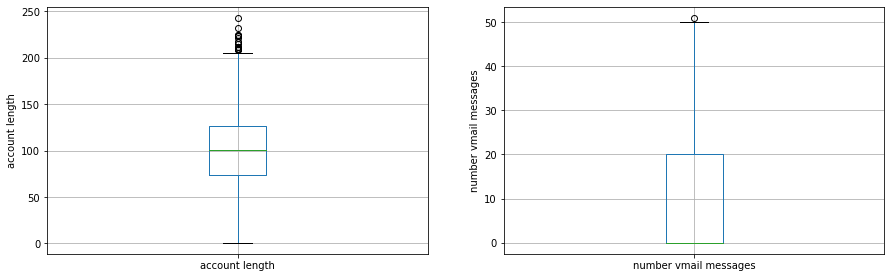

In [45]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='account length')
fig.set_title('')
fig.set_ylabel('account length')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='number vmail messages')
fig.set_title('')
fig.set_ylabel('number vmail messages')

Text(0, 0.5, 'total day calls')

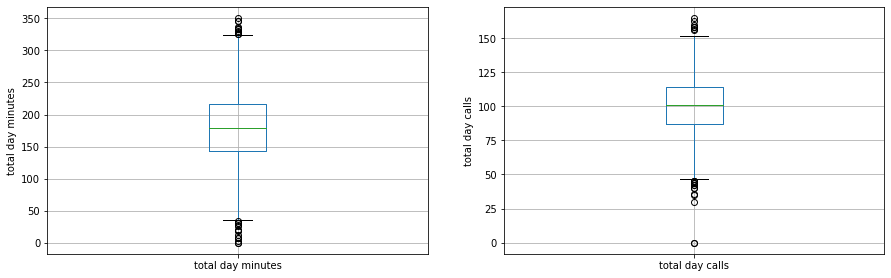

In [48]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total day minutes')
fig.set_title('')
fig.set_ylabel('total day minutes')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total day calls')
fig.set_title('')
fig.set_ylabel('total day calls')

Text(0, 0.5, 'total eve minutes')

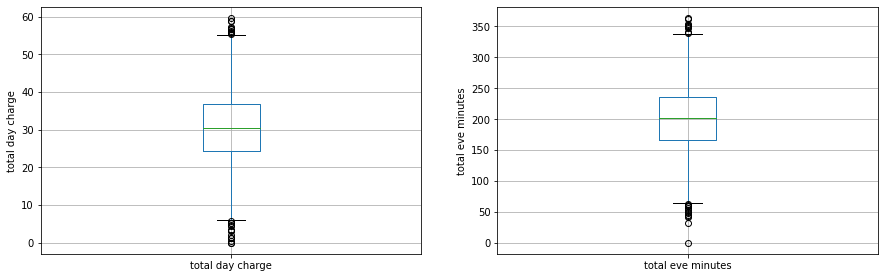

In [51]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total day charge')
fig.set_title('')
fig.set_ylabel('total day charge')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total eve minutes')
fig.set_title('')
fig.set_ylabel('total eve minutes')

Text(0, 0.5, 'total eve charge')

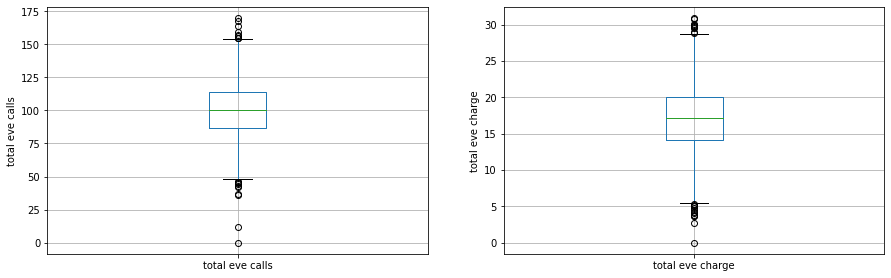

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total eve calls')
fig.set_title('')
fig.set_ylabel('total eve calls')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='total eve charge')
fig.set_title('')
fig.set_ylabel('total eve charge')

Text(0, 0.5, 'total night charge')

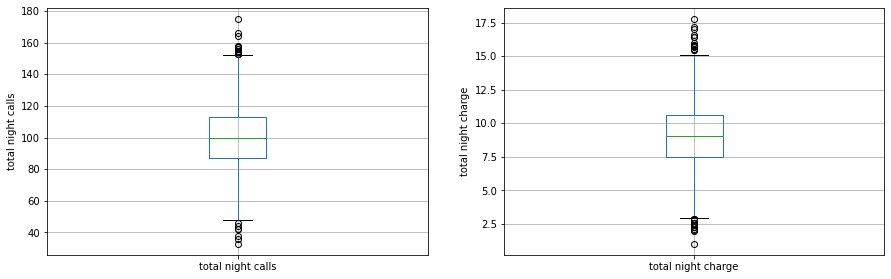

In [54]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night minutes')
fig.set_title('')
fig.set_ylabel('total night minutes')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='total night calls')
fig.set_title('')
fig.set_ylabel('total night calls')

Text(0, 0.5, 'total eve charge')

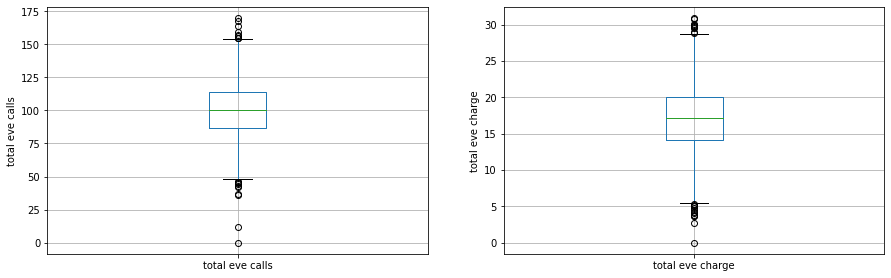

In [53]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total night charge')
fig.set_title('')
fig.set_ylabel('total night charge')


Text(0, 0.5, 'total night calls')

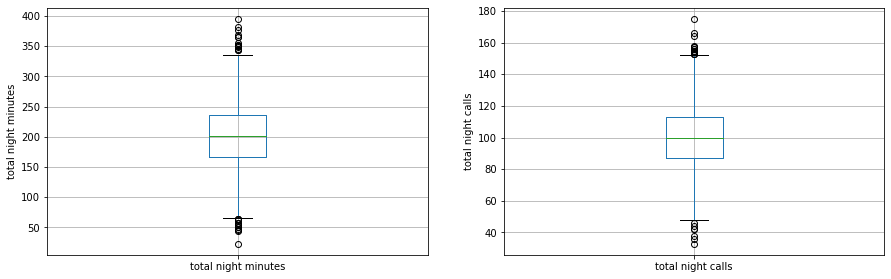

In [57]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night minutes')
fig.set_title('')
fig.set_ylabel('total night minutes')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='total night calls')
fig.set_title('')
fig.set_ylabel('total night calls')

Text(0, 0.5, 'total night charge')

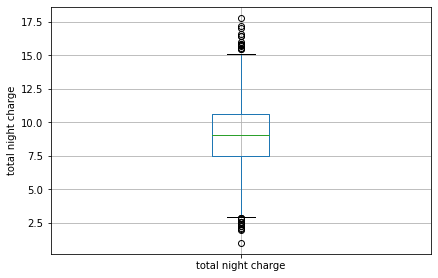

In [58]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='total night charge')
fig.set_title('')
fig.set_ylabel('total night charge')

Text(0, 0.5, 'customer service calls')

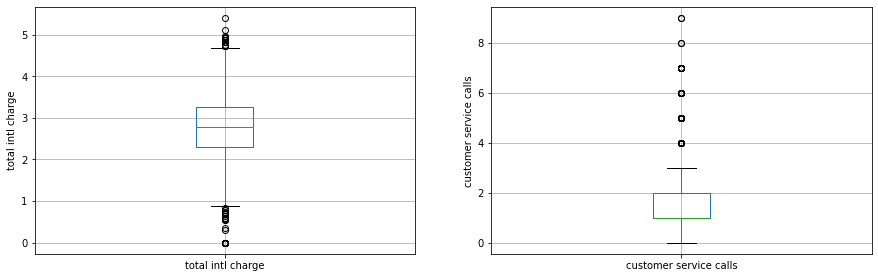

In [56]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total intl charge')
fig.set_title('')
fig.set_ylabel('total intl charge')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='customer service calls')
fig.set_title('')
fig.set_ylabel('customer service calls')

### Explore the Target outcome: Churn

In [59]:
#confirm the boolean column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [60]:
# Convert the boolean churn column to 'Yes'/'No'
df['churn'] = df['churn'].apply(lambda x: 'Yes' if x else 'No')

# Check the first few rows to ensure the change has been made
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


churn column converted to a categorical variable
confirm churn is a categorical variable

In [62]:
# find categorical variables after churn changed from boolean to binary

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 5 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']


In [63]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,No
1,OH,371-7191,no,yes,No
2,NJ,358-1921,no,no,No
3,OH,375-9999,yes,no,No
4,OK,330-6626,yes,no,No


In [64]:
# view frequency of target categorical variable - churn

print(df['churn'].value_counts())

No     2850
Yes     483
Name: churn, dtype: int64


In [65]:
# view frequency distribution of target categorical variables: churn

print(df['churn'].value_counts()/np.float64(len(df)))

No     0.855086
Yes    0.144914
Name: churn, dtype: float64


In [66]:
# print number of labels in churn variable
print('churn contains', len(df["churn"].unique()), 'labels')

churn contains 2 labels


In [67]:
# check labels in churn variable
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [68]:
# let's do One Hot Encoding of churn variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True,dtype='int').head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [69]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True).sum(axis=0)

Yes    483
NaN      0
dtype: int64